In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

In [2]:
def basic_eda(df):
    """
    See dataframe's info, shape, missing value, duplicate rows
    """
    print('Quick preview for our data:')
    display(df.head())
    print('\n')
    print(f"Dataframe shape: {df.shape}\n")
    print('/ Columns info:')
    display(df.info())
    print('Summary Statistics for numerical columns:')
    display(df.describe())
    print('Summary Statistics for categorical columns:')
    display(df.describe(include=[object]))
    print(f"\
    \nRows count = {len(df)}\
    \nNull count:\
    \n{df.isnull().sum()}\
    \n\
    \nOverall missing values in data: {df.isnull().sum().sum()}\
    \n\nDuplicated Rows: {df.duplicated().sum()}\
    \n\nUnique values count:\
    \n{df.nunique()}\
    \n\nData types in dataset:\
    \n{df.dtypes.value_counts()}")

#### Importing the data:

In [3]:
df_can_all = pd.read_csv("CAN Lab Data 5.28.21.csv")
df_sessions = pd.read_csv("canlab_full_sessions.csv")

#### Filtering relevant features+targets only:

In [4]:
df_can = df_can_all[['MasterID', 'age', 'dom_hand', 'education', 'ethnicity', 'race', 'weight_before', 'current_weight', 
                     'current_height', 'birth_order', 'thyroid', 'anemia', 'sickle_anemia', 'thalassemia', 'arthritis', 
                     'seizure', 'murmur', 'asthma', 'pulmonary', 'diabetes', 'hypertension', 'renal', 'kidney_infect', 
                     'bladder_infect', 'HIV', 'AIDS', 'TB', 'abn_pap', 'cancer', 'psych_med', 'antipsychotic', 'stimulant', 'antidepressant', 'anxiety_med', 'mood_stab', 
                     'gest_hyp', 'pre_eclampsia', 'gest_diabetes', 'uterine_restrict', 'macrosomia', 'congenital', 
                     'oligohydramnios', 'polyhydramnios', 'psaavmA', 'psatotmA', 'cesdtotmA', 'cesdclinmA', 'cesdsevmA', 
                     'DERSnamA', 'DERSgmA', 'DERSimpmA', 'DERSawmA', 'DERSstgmA', 'DERSclrmA', 'DERStotmA']]

df_can.head()

,MasterID,age,dom_hand,education,ethnicity,race,weight_before,current_weight,current_height,birth_order,...,cesdtotmA,cesdclinmA,cesdsevmA,DERSnamA,DERSgmA,DERSimpmA,DERSawmA,DERSstgmA,DERSclrmA,DERStotmA
0,1773,27,2,6,2,5,150,,,,...,7,0,1,10,8,6,12,10,8,54
1,1778,24,2,6,2,5,150,,,,...,24,1,3,19,14,7,21,13,7,81
2,1779,34,1,7,2,5,145,172,68,2,...,14,0,1,17,14,10,14,22,11,88
3,1780,28,2,6,2,5,155,194,65,3,...,23,1,3,25,20,19,13,22,12,111
4,1781,27,2,3,2,6,300,360,65,,...,10,0,1,8,10,7,6,10,5,46


#### Replacing white spaces with Nan:

In [5]:
df_can = df_can.replace(r'^\s+$', np.nan, regex=True)

#### Basic information on our data:

In [6]:
basic_eda(df_can)

Quick preview for our data:


,MasterID,age,dom_hand,education,ethnicity,race,weight_before,current_weight,current_height,birth_order,...,cesdtotmA,cesdclinmA,cesdsevmA,DERSnamA,DERSgmA,DERSimpmA,DERSawmA,DERSstgmA,DERSclrmA,DERStotmA
0,1773,27,2,6,2,5,150,NaN,NaN,NaN,...,7,0,1,10,8,6,12,10,8,54
1,1778,24,2,6,2,5,150,NaN,NaN,NaN,...,24,1,3,19,14,7,21,13,7,81
2,1779,34,1,7,2,5,145,172,68,2,...,14,0,1,17,14,10,14,22,11,88
3,1780,28,2,6,2,5,155,194,65,3,...,23,1,3,25,20,19,13,22,12,111
4,1781,27,2,3,2,6,300,360,65,NaN,...,10,0,1,8,10,7,6,10,5,46




Dataframe shape: (35, 55)

/ Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   MasterID          35 non-null     int64 
 1   age               35 non-null     int64 
 2   dom_hand          35 non-null     int64 
 3   education         35 non-null     int64 
 4   ethnicity         35 non-null     int64 
 5   race              35 non-null     int64 
 6   weight_before     35 non-null     int64 
 7   current_weight    33 non-null     object
 8   current_height    33 non-null     object
 9   birth_order       26 non-null     object
 10  thyroid           35 non-null     int64 
 11  anemia            35 non-null     int64 
 12  sickle_anemia     35 non-null     int64 
 13  thalassemia       35 non-null     int64 
 14  arthritis         35 non-null     int64 
 15  seizure           35 non-null     int64 
 16  murmur            3

None

Summary Statistics for numerical columns:


,MasterID,age,dom_hand,education,ethnicity,race,weight_before,thyroid,anemia,sickle_anemia,...,anxiety_med,mood_stab,gest_hyp,pre_eclampsia,gest_diabetes,uterine_restrict,macrosomia,congenital,oligohydramnios,polyhydramnios
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0,...,35.000000,35.0,35.000000,35.0,35.000000,35.0,35.0,35.0,35.0,35.000000
mean,1793.914286,28.628571,1.828571,5.228571,7.428571,10.485714,167.571429,0.028571,0.371429,0.0,...,0.057143,0.0,0.085714,0.0,0.085714,0.0,0.0,0.0,0.0,0.028571
std,10.511538,4.066258,0.382385,1.832480,22.874704,22.119158,49.157781,0.169031,0.490241,0.0,...,0.235504,0.0,0.284029,0.0,0.284029,0.0,0.0,0.0,0.0,0.169031
min,1773.000000,19.000000,1.000000,1.000000,1.000000,3.000000,107.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,1785.500000,26.000000,2.000000,4.500000,2.000000,5.000000,140.500000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,1794.000000,28.000000,2.000000,6.000000,2.000000,5.000000,151.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,1802.500000,31.500000,2.000000,6.000000,2.000000,5.500000,180.000000,0.000000,1.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
max,1812.000000,38.000000,2.000000,8.000000,99.000000,99.000000,333.000000,1.000000,1.000000,0.0,...,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.000000


Summary Statistics for categorical columns:


,current_weight,current_height,birth_order,psaavmA,psatotmA,cesdtotmA,cesdclinmA,cesdsevmA,DERSnamA,DERSgmA,DERSimpmA,DERSawmA,DERSstgmA,DERSclrmA,DERStotmA
count,33,33,26,34,34,34,34,34,31,31,31,31,31,31,31
unique,27,13,5,16,16,20,2,3,17,14,13,14,14,11,27
top,181,65,2,1.5,15,14,0,1,12,14,10,12,10,8,74
freq,3,6,13,5,5,4,24,24,5,5,7,5,6,6,2


    
Rows count = 35    
Null count:    
MasterID            0
age                 0
dom_hand            0
education           0
ethnicity           0
race                0
weight_before       0
current_weight      2
current_height      2
birth_order         9
thyroid             0
anemia              0
sickle_anemia       0
thalassemia         0
arthritis           0
seizure             0
murmur              0
asthma              0
pulmonary           0
diabetes            0
hypertension        0
renal               0
kidney_infect       0
bladder_infect      0
HIV                 0
AIDS                0
TB                  0
abn_pap             0
cancer              0
psych_med           0
antipsychotic       0
stimulant           0
antidepressant      0
anxiety_med         0
mood_stab           0
gest_hyp            0
pre_eclampsia       0
gest_diabetes       0
uterine_restrict    0
macrosomia          0
congenital          0
oligohydramnios     0
polyhydramnios      0
psaavmA      

We have some missing value we'll need to fill, and convert a few of the columns to numerical.

We can also see there are some sparse columns which we can get rid of since they will be no use for our training.

#### Data Integrity:

In [7]:
diseases_features = ['thyroid', 'anemia', 'sickle_anemia', 'thalassemia', 'arthritis', 'seizure', 'murmur', 'asthma', 
        'pulmonary', 'diabetes', 'hypertension', 'renal', 'kidney_infect', 'bladder_infect', 'HIV', 'AIDS', 'TB', 'abn_pap', 
        'cancer', 'psych_med', 'antipsychotic', 'stimulant', 'antidepressant', 'anxiety_med', 'mood_stab', 
       'gest_hyp', 'pre_eclampsia', 'gest_diabetes', 'uterine_restrict', 'macrosomia', 'congenital', 'oligohydramnios',
       'polyhydramnios']

print('Prior Diseases features\' unique values:')
print()
for i in df_can[diseases_features]:
    print(i, df_can[i].unique())

Prior Diseases features' unique values:

thyroid [0 1]
anemia [0 1]
sickle_anemia [0]
thalassemia [0]
arthritis [1 0]
seizure [0 1]
murmur [0]
asthma [0 1]
pulmonary [0]
diabetes [0 1]
hypertension [0 1]
renal [0]
kidney_infect [0 1]
bladder_infect [0 1]
HIV [0]
AIDS [0]
TB [0]
abn_pap [ 0  1 99]
cancer [0]
psych_med [0 1]
antipsychotic [0]
stimulant [0 1]
antidepressant [0 1]
anxiety_med [0 1]
mood_stab [0]
gest_hyp [0 1]
pre_eclampsia [0]
gest_diabetes [0 1]
uterine_restrict [0]
macrosomia [0]
congenital [0]
oligohydramnios [0]
polyhydramnios [0 1]


We can see we have a value of 99 (declined to answer) in `abn_pap` so we'll convert it to the column's mode.

In [8]:
df_can.loc[df_can.abn_pap == 99, 'abn_pap'] = df_can.abn_pap.mode()

In [9]:
df_can['education'].unique()

array([6, 7, 3, 8, 1, 5, 4], dtype=int64)

In [10]:
df_can['dom_hand'].unique()

array([2, 1], dtype=int64)

In [11]:
df_can['birth_order'].all() > 0

True

In [12]:
df_can['cesdclinmA'].unique()

array(['0', '1', nan], dtype=object)

In [13]:
df_can['cesdsevmA'].unique()

array(['1', '3', '2', nan], dtype=object)

We will fill the missing values in the next section

In [14]:
df_can['cesdtotmA'].astype(float).min(), df_can['cesdtotmA'].astype(float).max()

(0.0, 36.84210526)

Since we have a float value in the `cesdtotmA` columns which should contain only integers, we will check for all study ids
if their `cesdtotmA` score matches the sum of appropriate columns. If they are not equal, we will fix them

In [15]:
# filtering only relevant ces-d columns
df_cesd = df_can_all.loc[:, df_can_all.columns.str.startswith("ces")]


# replacing white space with np.nan and removing from this inspection 
# (subject will be dropped anyway as does not have any questionarries scores)
df_cesd = df_cesd.replace(r'^\s+$', np.nan, regex=True)
df_cesd.dropna(inplace=True)


# dropping columns with reversed scale and irrelevant targets
unwanted_cols = ['cesd4ma', 'cesd8ma', 'cesd12ma', 'cesd16ma', 'cesdclinmA', 'cesdsevmA']
df_cesd = df_cesd.drop(columns = unwanted_cols).astype(float)


# replacing values of 99 with column's mode (mode function gave np.nan)
df_cesd.loc[df_cesd['cesd20ma'] == 99, 'cesd20ma'] = df_cesd['cesd20ma'].value_counts()[:1].index[0]

# manually calculating sum of scores 
df_cesd['sum_test'] = df_cesd.loc[:, df_cesd.columns != 'cesdtotmA'].sum(axis=1)
df_cesd['study_id'] = df_can_all['MasterID']

if not df_cesd['sum_test'].equals(df_cesd['cesdtotmA']):
    print("Study Id's which have unmatched score between cesdtotmA and the sum of scores:")
    print(df_cesd[['study_id', 'cesdtotmA', 'sum_test']][df_cesd['cesdtotmA'] != df_cesd['sum_test']])
else:
    print('All scores match')
    
df_can['cesdtotmA'] = df_cesd['sum_test']

Study Id's which have unmatched score between cesdtotmA and the sum of scores:
    study_id  cesdtotmA  sum_test
28      1805  36.842105      36.0


#### Imputing missing values with Sklearn's SimpleImputer:

We can ignore the fact that we're imputing the targets as well, since we will not use the samples which have missing values in targets.

In [16]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp_mean.fit(df_can)

df_can = pd.DataFrame(imp_mean.transform(df_can), columns = df_can.columns).astype(float)

df_can.head()

,MasterID,age,dom_hand,education,ethnicity,race,weight_before,current_weight,current_height,birth_order,...,cesdtotmA,cesdclinmA,cesdsevmA,DERSnamA,DERSgmA,DERSimpmA,DERSawmA,DERSstgmA,DERSclrmA,DERStotmA
0,1773.0,27.0,2.0,6.0,2.0,5.0,150.0,181.0,64.0,2.0,...,7.0,0.0,1.0,10.0,8.0,6.0,12.0,10.0,8.0,54.0
1,1778.0,24.0,2.0,6.0,2.0,5.0,150.0,181.0,64.0,2.0,...,24.0,1.0,3.0,19.0,14.0,7.0,21.0,13.0,7.0,81.0
2,1779.0,34.0,1.0,7.0,2.0,5.0,145.0,172.0,68.0,2.0,...,14.0,0.0,1.0,17.0,14.0,10.0,14.0,22.0,11.0,88.0
3,1780.0,28.0,2.0,6.0,2.0,5.0,155.0,194.0,65.0,3.0,...,23.0,1.0,3.0,25.0,20.0,19.0,13.0,22.0,12.0,111.0
4,1781.0,27.0,2.0,3.0,2.0,6.0,300.0,360.0,65.0,2.0,...,10.0,0.0,1.0,8.0,10.0,7.0,6.0,10.0,5.0,46.0


In [17]:
assert df_can.dtypes.all() == 'float64'

#### Creating new features based on CAN's data -  `num_of_prior_diseases`, `body_BMI`:

In [18]:
FEET_TO_METER = 0.254
LBS_TO_KG = 0.453592

df_can['num_of_prior_diseases'] = df_can[diseases_features].sum(axis=1)

df_can['body_BMI'] = df_can['current_weight']*LBS_TO_KG/(df_can['current_height']*FEET_TO_METER)**2*100

### Features' distributions:

#### Demographic features

In [19]:
hand_dict = {1 : 'Left', 2: 'Right'}

ethnicity_dict = {1 : 'Hispanic/Latinx', 2: 'Not Hispanic/Latinx', 99 : 'Declined to answer'}


education_dict = {1 : "Less than HS diploma", 2 : "HS graduate or equivalent",
                  3: "Some college, no degree", 4 : "Technical school", 
                  5 : "Associate's degree", 6 : "Bachelor's degree", 
                  7 : "Master's degree", 8 : "Doctoral degree"}

race_dict = {1 : "American Indian/Alaska Native", 2 : " Asian",
                  3: "Black/African American", 4 : "Native Hawaiian/Pacific Islander", 
                  5 : "White", 6 : "Prefer to self-report", 
                  7 : "more than one race", 99 :"decline to answer"}

df_can['dom_hand_tx'] = df_can['dom_hand'].map(lambda x: hand_dict[x])
df_can['ethnicity_tx'] = df_can['ethnicity'].map(lambda x: ethnicity_dict[x])
df_can['education_tx'] = df_can['education'].map(lambda x: education_dict[x])
df_can['race_tx'] = df_can['race'].map(lambda x: race_dict[x])

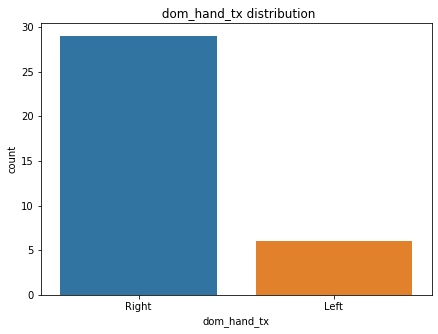

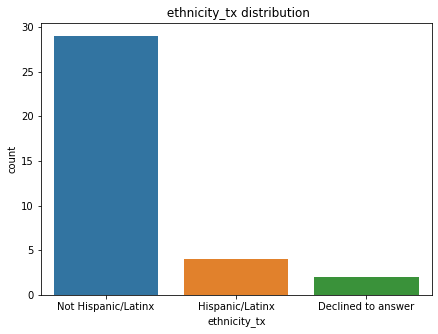

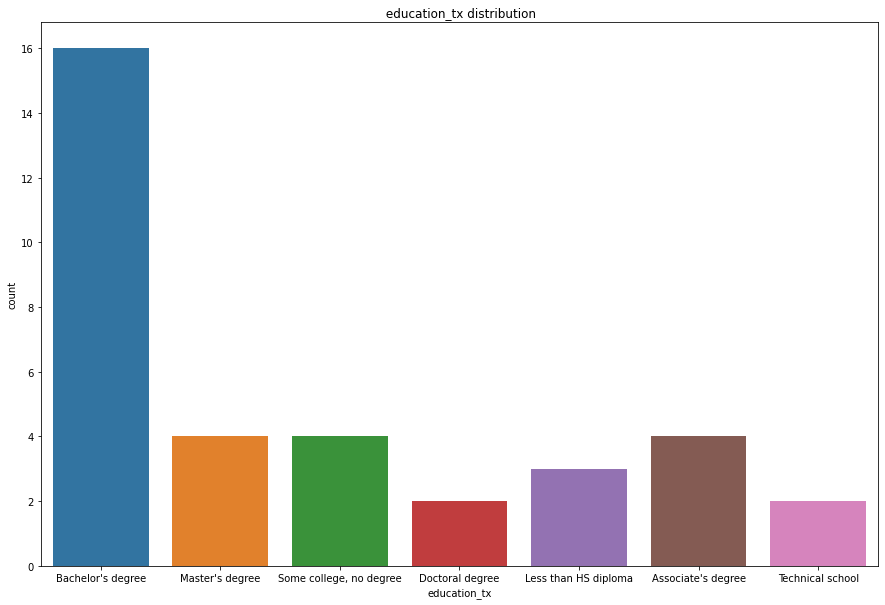

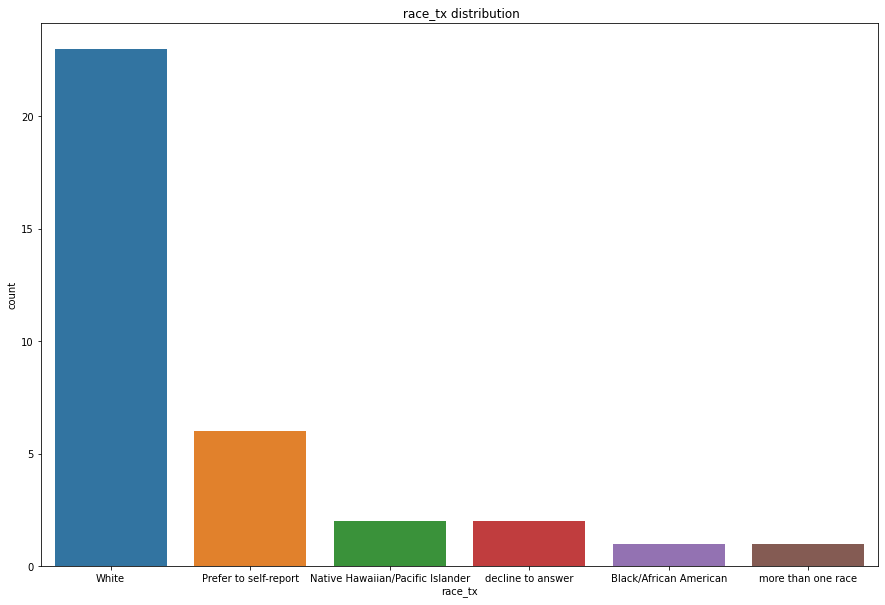

In [20]:
demographic_features = df_can.dtypes[df_can.dtypes == 'object'].index

for feat in demographic_features:
    if feat in ['dom_hand_tx', 'ethnicity_tx']:
        f, ax = plt.subplots(figsize=(7,5))
        sns.countplot(x = df_can[feat], data=df_can)
        plt.title(f' {feat} distribution')
    else:
        f, ax = plt.subplots(figsize=(15,10))
        sns.countplot(x = df_can[feat], data=df_can)
        plt.title(f' {feat} distribution')

We can see above: 
- Most patients (about 85%) are right-handed.
- About a half hold a bachelor's degree.
- There are 4 hispanics and most of the patients are white.

#### Distributions of `age`, `birth_order`:

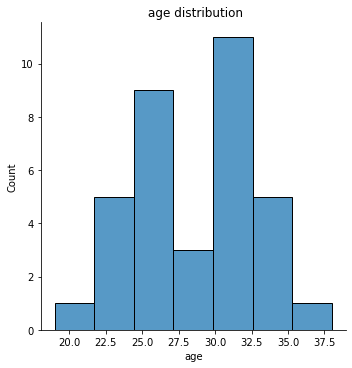

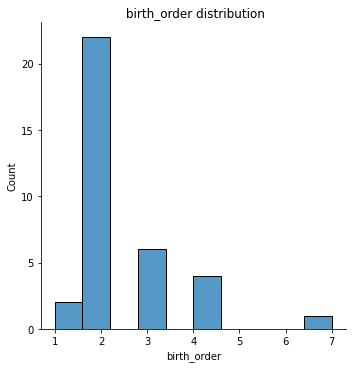

In [78]:
for feat in ['age', 'birth_order']:
    sns.displot(x = df_can[feat], data=df_can)
    plt.title(f' {feat} distribution');

Most of the patients are in their second or third labor, though we have imputed this feature so its giving some bias here towards 2.

#### Dropping textual columns

In [22]:
df_can.drop(columns = ['dom_hand_tx', 'ethnicity_tx', 'education_tx', 'race_tx'], inplace = True)

#### Prior disease features - checking for sparse columns

In [23]:
df_can[diseases_features].var()

thyroid             0.028571
anemia              0.240336
sickle_anemia       0.000000
thalassemia         0.000000
arthritis           0.055462
seizure             0.028571
murmur              0.000000
asthma              0.231933
pulmonary           0.000000
diabetes            0.028571
hypertension        0.028571
renal               0.000000
kidney_infect       0.080672
bladder_infect      0.104202
HIV                 0.000000
AIDS                0.000000
TB                  0.000000
abn_pap             0.080672
cancer              0.000000
psych_med           0.196639
antipsychotic       0.000000
stimulant           0.028571
antidepressant      0.221849
anxiety_med         0.055462
mood_stab           0.000000
gest_hyp            0.080672
pre_eclampsia       0.000000
gest_diabetes       0.080672
uterine_restrict    0.000000
macrosomia          0.000000
congenital          0.000000
oligohydramnios     0.000000
polyhydramnios      0.028571
dtype: float64

#### And removing them:

In [24]:
from sklearn.feature_selection import VarianceThreshold

VAR_THRESHOLD = 0.01

print(f'Shape before: {df_can.shape}')

selector = VarianceThreshold(VAR_THRESHOLD)

df_can = pd.DataFrame(selector.fit_transform(df_can), columns = df_can.columns[selector.get_support(indices=True)])

print(f'Shape after: {df_can.shape}')

Shape before: (35, 57)
Shape after: (35, 41)


#### Prior diseases feature distributions:

In [25]:
diseases_features.append('num_of_prior_diseases')

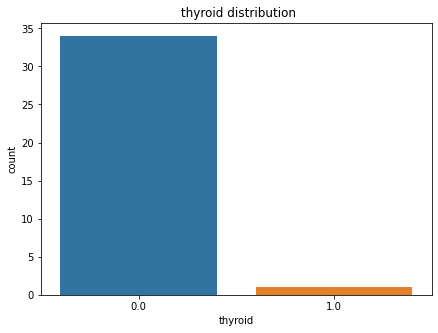

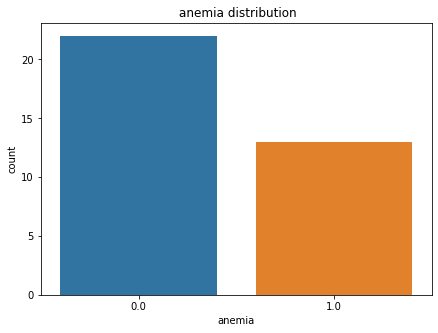

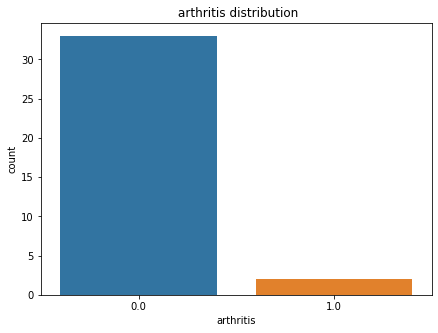

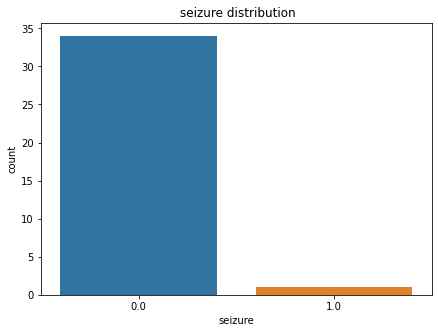

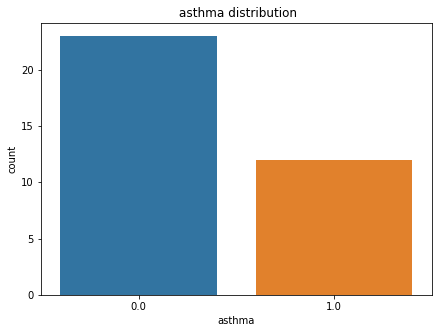

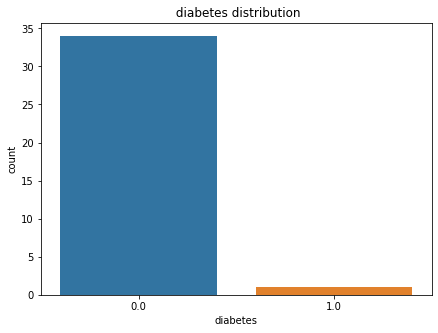

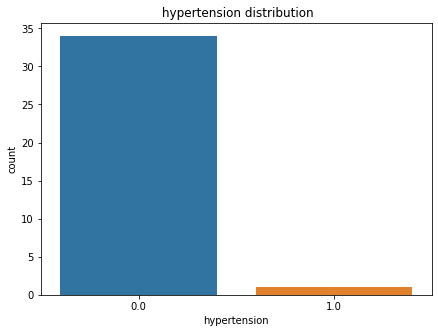

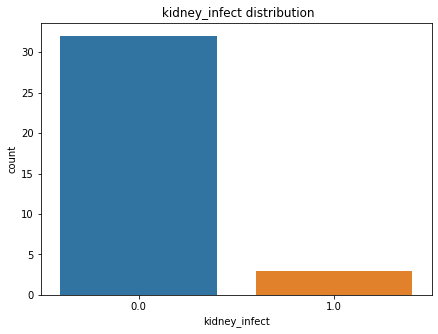

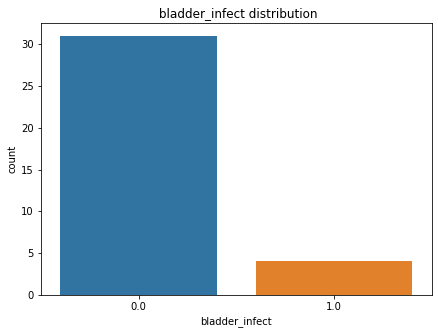

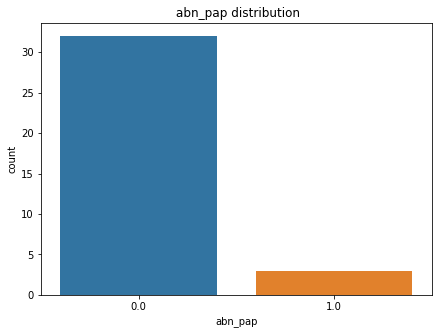

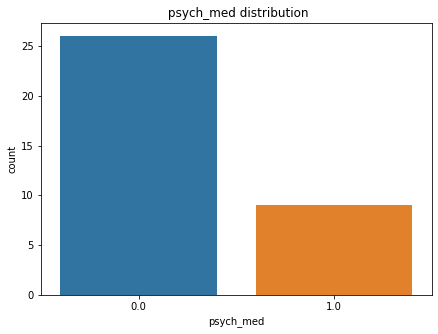

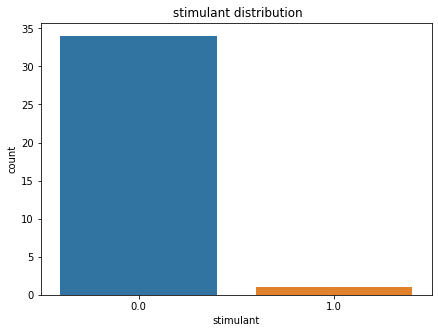

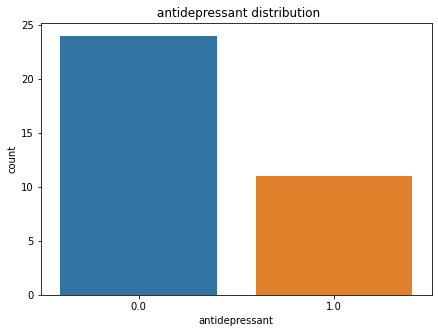

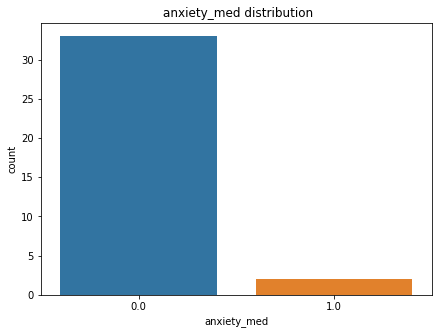

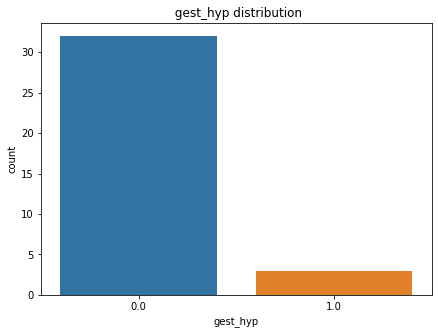

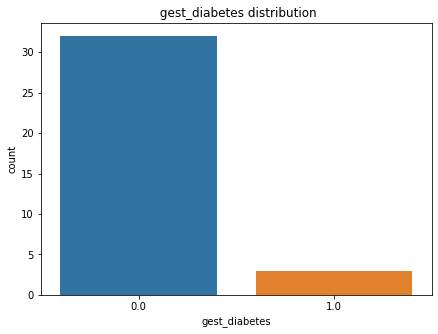

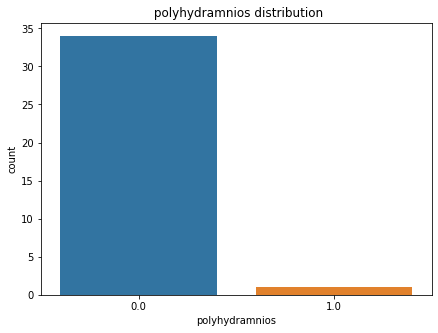

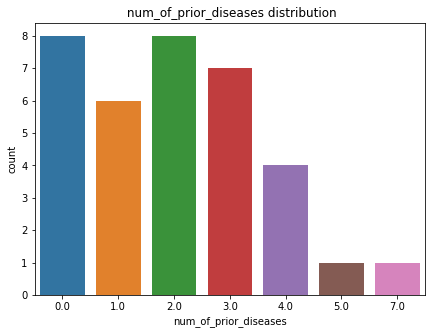

In [26]:
for dis_feat in diseases_features:
    if dis_feat in df_can.columns:
        f, ax = plt.subplots(figsize=(7,5))
        sns.countplot(x = df_can[dis_feat], data=df_can)
        plt.title(f' {dis_feat} distribution')

By observing the distriubtions of the prior diseases, we can see that most of them have distributions with very low cardinality. However there are a few diseases that a considerable amount of women have, like asthma, anemia and antidepressant (about 33%), and psych_med (about 25%). Also a few of them have bladder or kidney infect, gest_diabetes, abn_pap and/or gest_hyp

#### PSA Targets:

In [27]:
psa_targets = ['psaavmA', 'psatotmA']

psaavmA = Depression average score of all items
psatotmA = Depression sum score of all items


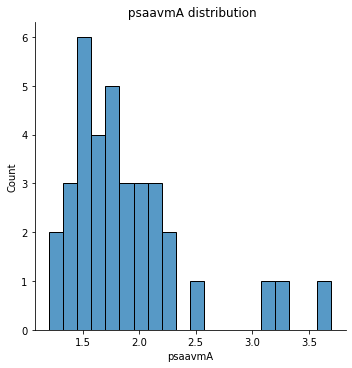

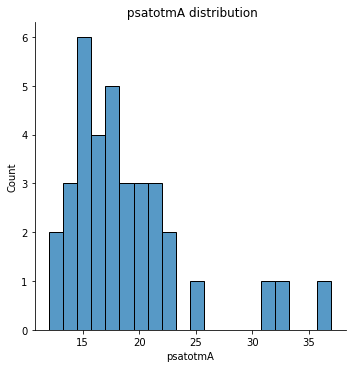

In [28]:
print("psaavmA = Depression average score of all items")
print("psatotmA = Depression sum score of all items")

for psa in psa_targets:
    sns.displot(x = df_can[psa], data=df_can, bins=20)
    plt.title(f' {psa} distribution');

In the psaavmA distribution the mean is about 1.9, and there are a few women with very high depression scores (over 3).

The psatotmA distribtion shows us exactly the same pattern just on a different scale.

In [29]:
print(f'Average score per psa question (psaavmA) = {round(df_can.psaavmA.mean(),2)}')

Average score per psa question (psaavmA) = 1.88


#### CES-D Targets:

In [30]:
cesd_targets = ['cesdtotmA', 'cesdclinmA', 'cesdsevmA']

cesdtotmA = Sum of all items
cesdclinmA = Whether the participant meets the clinical cutoff to diagnose with depression
cesdsevmA = Severity score


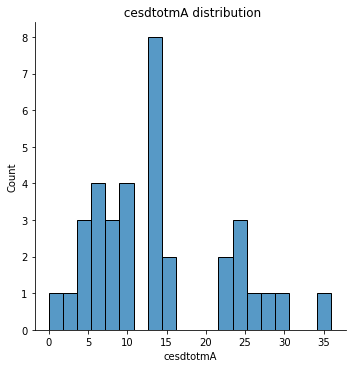

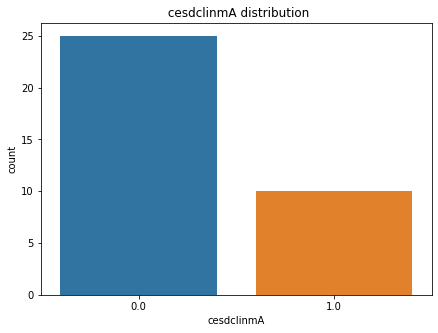

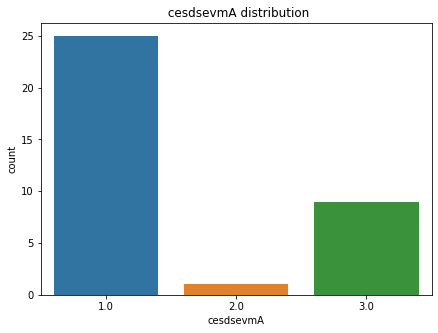

In [31]:
print("cesdtotmA = Sum of all items")
print("cesdclinmA = Whether the participant meets the clinical cutoff to diagnose with depression")
print("cesdsevmA = Severity score")

for cesd in cesd_targets:
    if cesd == 'cesdtotmA':
        sns.displot(x = df_can[cesd], data=df_can, bins=20)
        plt.title(f' {cesd} distribution')
    else:
        f, ax = plt.subplots(figsize=(7,5))
        sns.countplot(x = df_can[cesd], data=df_can)
        plt.title(f' {cesd} distribution');

* Almost 30% of the women meets the clinical cutoff to be diagnosed with depression

* about 25% have severe symptoms and about 70% have no/mild symptoms.

#### DERS Targets

In [32]:
ders_targets = ['DERSnamA', 'DERSgmA', 'DERSimpmA', 'DERSawmA', 'DERSstgmA', 'DERSclrmA', 'DERStotmA']

DERSnamA = Nonacceptace of emotional responses sum
DERSgmA = Difficulty engaging in goal-directed behavior
DERSimpmA = Impulse control difficulties
DERSawmA = Lack of emotional awareness
DERSstgmA = Limited access to emotion regulation strategies
DERSclrmA = Lack of emotional clarity
DERStotmA = Sum of all items


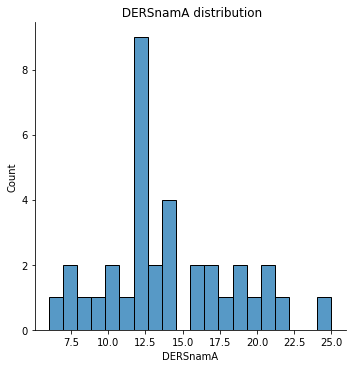

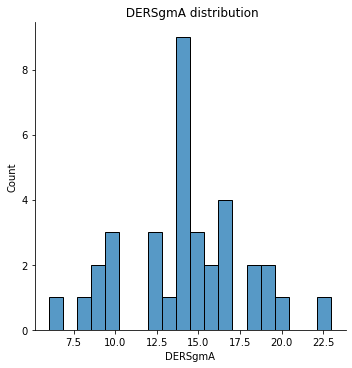

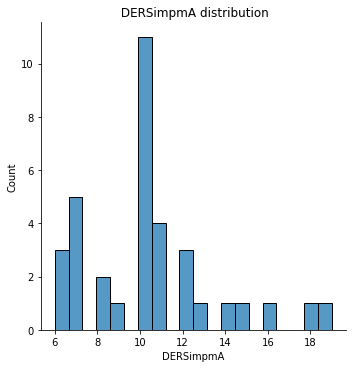

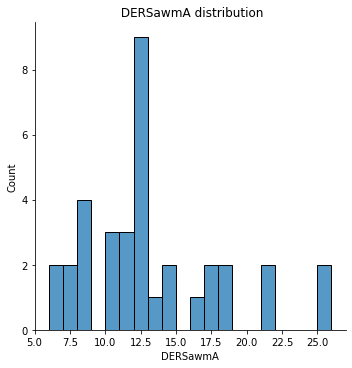

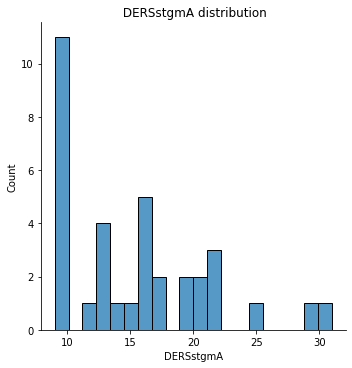

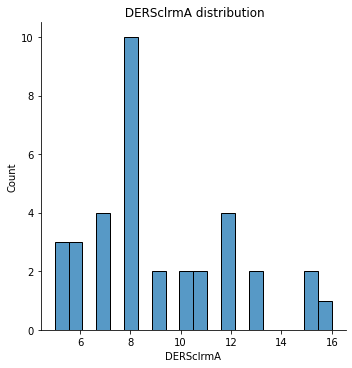

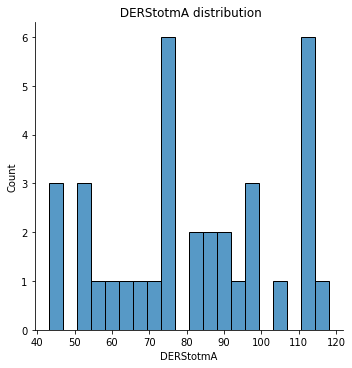

In [33]:
print("DERSnamA = Nonacceptace of emotional responses sum")
print("DERSgmA = Difficulty engaging in goal-directed behavior")
print("DERSimpmA = Impulse control difficulties")
print("DERSawmA = Lack of emotional awareness")
print("DERSstgmA = Limited access to emotion regulation strategies")
print("DERSclrmA = Lack of emotional clarity")
print("DERStotmA = Sum of all items")

for ders in ders_targets:
    sns.displot(x = df_can[ders], data=df_can, bins=20)
    plt.title(f' {ders} distribution');

In [34]:
df_can.head()

,MasterID,age,dom_hand,education,ethnicity,race,weight_before,current_weight,current_height,birth_order,...,cesdsevmA,DERSnamA,DERSgmA,DERSimpmA,DERSawmA,DERSstgmA,DERSclrmA,DERStotmA,num_of_prior_diseases,body_BMI
0,1773.0,27.0,2.0,6.0,2.0,5.0,150.0,181.0,64.0,2.0,...,1.0,10.0,8.0,6.0,12.0,10.0,8.0,54.0,1.0,31.068235
1,1778.0,24.0,2.0,6.0,2.0,5.0,150.0,181.0,64.0,2.0,...,3.0,19.0,14.0,7.0,21.0,13.0,7.0,81.0,1.0,31.068235
2,1779.0,34.0,1.0,7.0,2.0,5.0,145.0,172.0,68.0,2.0,...,1.0,17.0,14.0,10.0,14.0,22.0,11.0,88.0,4.0,26.152221
3,1780.0,28.0,2.0,6.0,2.0,5.0,155.0,194.0,65.0,3.0,...,3.0,25.0,20.0,19.0,13.0,22.0,12.0,111.0,2.0,32.282932
4,1781.0,27.0,2.0,3.0,2.0,6.0,300.0,360.0,65.0,2.0,...,1.0,8.0,10.0,7.0,6.0,10.0,5.0,46.0,2.0,59.906472


# Combining the datasets:

In [35]:
df = df_sessions.merge(df_can, left_on='study_id', right_on='MasterID')

#### Basic information on our sessions data:

In [36]:
basic_eda(df_sessions)

Quick preview for our data:


,study_id,session_id,subject_id,body_meas_height,body_meas_prior_pregnancy_weight,body_meas_bmi,mon_sess_time_zone_diff,mon_sess_date,mon_sess_start_time,mon_sess_duration,...,m_VLF_FINE,m_hf_peak_freq,m_hr_avg,m_hr_detection_rate,m_lf_peak_freq,m_mf_peak_freq,m_pRR5,m_pRR50,m_porousness,m_vlf_peak_freq
0,1773.0,2dfb3a16-7ea3-4875-a9bf-3d36217684b4,7162c259-764e-4ec9-94cd-bcb41625a63e,165.1,68.0272,25.0,-600,10/20/2020,17:04:02,0:20:00,...,2.112098e+07,0.517132,74.615242,0.982937,0.052854,0.152757,89.206762,25.747724,0.000191,0.000200
1,1773.0,3cd2b1f6-76e9-4e32-ac74-24683310f313,7162c259-764e-4ec9-94cd-bcb41625a63e,165.1,68.0272,25.0,-600,10/20/2020,16:29:14,0:14:32,...,2.058526e+07,0.517154,75.942601,0.926944,0.032266,0.156550,85.944919,17.758784,0.000322,0.000598
2,1773.0,0ceb8624-979a-47d3-862e-7371b80968ad,7162c259-764e-4ec9-94cd-bcb41625a63e,165.1,68.0272,25.0,-600,10/20/2020,16:49:42,0:13:01,...,1.121174e+07,0.502899,80.769556,0.917857,0.035393,0.152189,87.415946,15.658021,0.000351,0.000322
3,1773.0,010248fa-c5ea-411c-b651-2137876f828b,7162c259-764e-4ec9-94cd-bcb41625a63e,165.1,68.0272,25.0,-600,10/20/2020,17:24:48,0:20:00,...,2.676237e+07,0.508518,73.684835,0.985833,0.035858,0.151612,90.013774,28.374656,0.000195,0.000419
4,1773.0,f6d67ea5-54d7-4fda-8e1f-45d77d65982c,7162c259-764e-4ec9-94cd-bcb41625a63e,165.1,68.0272,25.0,-600,10/20/2020,16:24:26,0:03:59,...,1.143223e+06,0.503753,76.089828,0.741667,0.069966,0.152525,88.053097,23.451327,0.001767,0.002799




Dataframe shape: (54, 167)

/ Columns info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Columns: 167 entries, study_id to m_vlf_peak_freq
dtypes: float64(139), int64(9), object(19)
memory usage: 70.6+ KB


None

Summary Statistics for numerical columns:


,study_id,body_meas_height,body_meas_prior_pregnancy_weight,body_meas_bmi,mon_sess_time_zone_diff,dem_det_age,dem_det_pregnancy_week,dem_det_num_total_pregnancies,dem_det_num_term_birth,dem_det_num_preterm_births,...,m_VLF_FINE,m_hf_peak_freq,m_hr_avg,m_hr_detection_rate,m_lf_peak_freq,m_mf_peak_freq,m_pRR5,m_pRR50,m_porousness,m_vlf_peak_freq
count,51.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,30.000000,30.000000,30.000000,...,5.300000e+01,53.000000,54.000000,54.000000,53.000000,53.000000,54.000000,54.000000,54.000000,53.000000
mean,1792.960784,166.087778,73.007481,26.555556,-631.481481,28.462963,36.904765,2.233333,0.833333,0.100000,...,3.788604e+07,0.528456,87.056862,0.916774,0.047558,0.154143,74.165838,12.382827,0.000323,0.000827
std,12.404775,8.023340,19.045074,6.936196,46.880314,3.694529,1.225449,1.304722,0.833908,0.305129,...,3.771592e+07,0.036218,11.228556,0.086658,0.017660,0.004803,18.678977,11.301592,0.000874,0.001367
min,1773.000000,149.860000,48.526100,18.000000,-700.000000,22.000000,35.142900,1.000000,0.000000,0.000000,...,3.569133e+04,0.500104,64.001948,0.500000,0.030200,0.150043,24.397738,0.196657,0.000044,0.000042
25%,1783.000000,162.560000,63.605475,23.475000,-700.000000,26.000000,36.000000,1.000000,0.000000,0.000000,...,1.370945e+07,0.504258,77.959559,0.886906,0.032412,0.150339,66.381834,3.004591,0.000066,0.000145
50%,1793.000000,165.100000,67.346950,25.000000,-600.000000,28.000000,36.571400,2.000000,1.000000,0.000000,...,2.694029e+07,0.514871,86.735852,0.942002,0.038222,0.152368,81.335638,9.109874,0.000090,0.000340
75%,1803.500000,170.180000,74.829900,26.900000,-600.000000,30.750000,38.000000,3.000000,1.000000,0.000000,...,5.029038e+07,0.533004,92.845716,0.974368,0.060770,0.156338,87.344020,21.875454,0.000195,0.000758
max,1814.000000,185.420000,155.102000,57.000000,-600.000000,38.000000,41.000000,7.000000,3.000000,1.000000,...,1.841464e+08,0.634159,114.034857,0.995395,0.093311,0.170611,91.630799,46.787821,0.006250,0.008528


Summary Statistics for categorical columns:


,session_id,subject_id,mon_sess_date,mon_sess_start_time,mon_sess_duration,f_LTI,f_LTI_10,f_LTI_25,f_LTI_50,f_LTI_IBI,f_STI,f_STI_10,f_STI_25,f_STI_50,f_STI_IBI,m_LTI,m_LTI_IBI,m_STI,m_STI_IBI
count,54,54,54,54,54,53,53,53,53,42,53,53,53,53,42,53,52,53,52
unique,54,33,33,54,53,53,53,53,53,42,53,53,53,53,42,53,52,53,52
top,fd5dbc76-93b9-4186-9080-c7014fc4a4da,65e33be7-ebea-417a-a203-32eb097ad67f,12/10/2020,18:17:12,0:20:00,"[181.660531074026, 199.434696325533]","[184.697348942423, 196.795455098179]","[189.699643000348, 197.899868812508]","[186.400473763549, 193.91441618596]","[575.600173856466, 639.291512270653]","[0.785270339785092, 0.785878782712646]","[0.784749576750573, 0.786097249642284]","[0.783977955559199, 0.786879176973674]","[0.78445118972765, 0.786498874805712]","[0.776382255269679, 0.792474049115819]","[142.860883145199, 153.777084766824]","[875.887009820751, 951.444218075599]","[0.785010456926383, 0.785805061183854]","[0.768377572913465, 0.801867066814141]"
freq,1,5,5,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


    
Rows count = 54    
Null count:    
study_id                            3
session_id                          0
subject_id                          0
body_meas_height                    0
body_meas_prior_pregnancy_weight    0
                                   ..
m_mf_peak_freq                      1
m_pRR5                              0
m_pRR50                             0
m_porousness                        0
m_vlf_peak_freq                     1
Length: 167, dtype: int64    
    
Overall missing values in data: 537    

Duplicated Rows: 0    

Unique values count:    
study_id                            31
session_id                          54
subject_id                          33
body_meas_height                    12
body_meas_prior_pregnancy_weight    27
                                    ..
m_mf_peak_freq                      53
m_pRR5                              54
m_pRR50                             54
m_porousness                        52
m_vlf_peak_freq           

#### Removing sessions with duration of less than 5 minutes:

In [37]:
sessions_to_drop = []

print('Sessions dropped:')
print()
for i in range(len(df['mon_sess_duration'])-1):
    session = datetime.strptime(df['mon_sess_duration'].iloc[i], '%H:%M:%S').time()
    if session.hour == 0 and session.minute < 5:
        sessions_to_drop.append(df['session_id'].iloc[i])
        print(df['session_id'].iloc[i])
        
df = df[~df.session_id.isin(sessions_to_drop)]

Sessions dropped:

f6d67ea5-54d7-4fda-8e1f-45d77d65982c
e8013bf8-f905-448e-901e-49891b8507fd


In [38]:
df.shape

(47, 208)

#### Checking if measurements are equal in both datasets:

#### Height:

In [39]:
FEET_TO_CM = 2.54

df['current_height_cm'] = df['current_height']*FEET_TO_CM

df[['study_id', 'body_meas_height', 'current_height_cm', 'current_height']].head(10)

,study_id,body_meas_height,current_height_cm,current_height
0,1773.0,165.10,162.56,64.0
1,1773.0,165.10,162.56,64.0
2,1773.0,165.10,162.56,64.0
3,1773.0,165.10,162.56,64.0
5,1778.0,172.72,162.56,64.0
6,1779.0,172.72,172.72,68.0
7,1779.0,172.72,172.72,68.0
8,1780.0,165.10,165.10,65.0
9,1780.0,165.10,165.10,65.0
10,1781.0,165.10,165.10,65.0


In [40]:
df['body_meas_height'].equals(df['current_height_cm'])

False

In [41]:
print("Study Id's which have unmatched height measurements between datasets")
print(df['study_id'][df['body_meas_height'] != df['current_height_cm']].unique().astype(int))

Study Id's which have unmatched height measurements between datasets
[1773 1778 1787 1797 1798 1799 1800 1805 1809]


#### Prior weight:

In [42]:
df['weight_before_kg'] = df['weight_before']*LBS_TO_KG

df[['study_id', 'body_meas_prior_pregnancy_weight', 'weight_before_kg', 'weight_before']].head(10)

,study_id,body_meas_prior_pregnancy_weight,weight_before_kg,weight_before
0,1773.0,68.0272,68.03880,150.0
1,1773.0,68.0272,68.03880,150.0
2,1773.0,68.0272,68.03880,150.0
3,1773.0,68.0272,68.03880,150.0
5,1778.0,68.0272,68.03880,150.0
6,1779.0,65.7596,65.77084,145.0
7,1779.0,65.7596,65.77084,145.0
8,1780.0,70.2948,70.30676,155.0
9,1780.0,70.2948,70.30676,155.0
10,1781.0,155.1020,136.07760,300.0


In [43]:
df['body_meas_prior_pregnancy_weight'].equals(df['weight_before_kg'])

False

In [44]:
print("Study Id's which have unmatched prior_weight measurements between datasets")
print(df['study_id'][np.floor(df['body_meas_prior_pregnancy_weight']) != np.floor(df['weight_before_kg'])].unique().astype(int))

Study Id's which have unmatched prior_weight measurements between datasets
[1781 1786 1791 1792 1795 1798 1805 1809]


#### Current Weight:

In [45]:
df['current_weight_kg'] = df['current_weight']*LBS_TO_KG

df[['study_id', 'body_meas_prior_pregnancy_weight', 'body_meas_current_weight', 
    'current_weight_kg', 'current_weight']].head()

,study_id,body_meas_prior_pregnancy_weight,body_meas_current_weight,current_weight_kg,current_weight
0,1773.0,68.0272,68.0272,82.100152,181.0
1,1773.0,68.0272,68.0272,82.100152,181.0
2,1773.0,68.0272,68.0272,82.100152,181.0
3,1773.0,68.0272,68.0272,82.100152,181.0
5,1778.0,68.0272,68.0272,82.100152,181.0


The `body_meas_prior_pregnancy_weight` and the `body_meas_current_weight` is equal, so we'll use the CAN `current_weight_kg` column.

In [46]:
df['age'].equals(df['dem_det_age'])

False

In [47]:
print("Study Id's which have unmatched age between datasets")
print(df['study_id'][np.floor(df['age']) != np.floor(df['dem_det_age'])].unique().astype(int))

Study Id's which have unmatched age between datasets
[1778]


In [48]:
df[['study_id', 'dem_det_num_total_pregnancies', 'dem_det_num_term_birth', 'dem_det_num_preterm_births', 
    'dem_det_num_abortions', 'birth_order']].head(10)

,study_id,dem_det_num_total_pregnancies,dem_det_num_term_birth,dem_det_num_preterm_births,dem_det_num_abortions,birth_order
0,1773.0,NaN,NaN,NaN,NaN,2.0
1,1773.0,NaN,NaN,NaN,NaN,2.0
2,1773.0,NaN,NaN,NaN,NaN,2.0
3,1773.0,NaN,NaN,NaN,NaN,2.0
5,1778.0,NaN,NaN,NaN,NaN,2.0
6,1779.0,NaN,NaN,NaN,NaN,2.0
7,1779.0,NaN,NaN,NaN,NaN,2.0
8,1780.0,NaN,NaN,NaN,NaN,3.0
9,1780.0,NaN,NaN,NaN,NaN,3.0
10,1781.0,NaN,NaN,NaN,NaN,2.0


The above columns have many missing values, we will drop them and settle for the `birth_order` feature.

#### Observving missing data for study ids:

In [49]:
print("Study ID's which have CAN questionnaires but missing sessions data:")
print(set(df_can.MasterID.unique().astype(int)).difference(df.study_id.unique()))

#df_temp = df_sessions.merge(df_can, how= 'left', left_on='study_id', right_on='MasterID')
print()
print("Study ID's which have sessions data but missing CAN questionnaires:")
print(set(df_sessions.study_id[df_sessions.study_id.notna()].unique().astype(int)).difference(df_can.MasterID.unique()))

missing_study_ids = df_sessions.subject_id[df_sessions.study_id.isna()].unique()
print()
print(f"There are {len(missing_study_ids)} missing study id's, below are their matching subject id's:")
print(missing_study_ids)

print()
print("The above study ids have been removed from the data for anaylsis")

Study ID's which have CAN questionnaires but missing sessions data:
{1807, 1810, 1784, 1785, 1788, 1790}

Study ID's which have sessions data but missing CAN questionnaires:
{1811, 1814}

There are 2 missing study id's, below are their matching subject id's:
['7bbb35b1-981a-4177-b885-2801a1d6938e'
 'b140d947-736d-438a-93bb-e956d2175f7e']

The above study ids have been removed from the data for anaylsis


#### Dropping unnecessary columns:

In [50]:
df.drop(columns = ['body_meas_height', 'body_meas_bmi', 'body_meas_prior_pregnancy_weight', 'body_meas_prior_pregnancy_weight', 
                   'mon_sess_time_zone_diff', 'mon_sess_date', 'mon_sess_start_time', 'mon_sess_duration', 'dem_det_age', 
                   'subject_id', 'session_id', 'current_weight_kg', 'weight_before_kg', 'current_height_cm', 
                   'body_meas_current_weight', 'MasterID'], inplace = True)

#### Dropping features with a high portion of missing values:

In [51]:
THRESHOLD = 0.33

cols_to_drop = []

print('Features dropped:')
print()
for column in df.columns:
    if df[column].isna().sum()/len(df[column]) > THRESHOLD:
        cols_to_drop.append(column)
        print(column, round(df[column].isna().sum()/len(df[column]), 3))
        
df.drop(columns = cols_to_drop, inplace = True)

Features dropped:

dem_det_num_total_pregnancies 0.468
dem_det_num_term_birth 0.468
dem_det_num_preterm_births 0.468
dem_det_num_abortions 0.468
dem_det_num_living_children 0.468
f_ALPHA_SI 0.362
f_RMSSD5 0.362
f_SDARR5 0.362
f_SDRRI5 0.362


#### Checking portions of missing values in ML-BI features:

In [52]:
T = 0.1

for column in df.columns:
    if df[column].isna().sum()/len(df[column]) > T:
        print(column, round(df[column].isna().sum()/len(df[column]), 3))

f_II_IBI 0.149
f_LTI_IBI 0.191
f_LTV_IBI 0.149
f_RMSSD1 0.149
f_RMSSD_30sec 0.128
f_SDARR1 0.149
f_SDARR_30sec 0.128
f_SDRRI1 0.149
f_SDRRI_30sec 0.128
f_STI_IBI 0.191
f_STV_IBI 0.149


#### Configuring LTI_STI features: (values are given as a string of two values, we will take the difference between them)

In [53]:
lti_sti_features = [col for col in df.columns if 'LTI' in col or 'STI' in col]

for feat in lti_sti_features:
    df[feat] = df[feat].map(lambda x: eval(x)[1] - eval(x)[0] if x==x else x)

#### And filling their missing values:

In [54]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

_ = imp_mean.fit(df)

df = pd.DataFrame(imp_mean.transform(df), columns = df.columns)

df.head()

,study_id,dem_det_pregnancy_week,f_DELTA_TOTAL,f_HF_COARSE,f_HF_FINE,f_HF_FINE_NORM,f_HR_HIST_MAX,f_HR_HIST_MEAN,f_HR_HIST_MEDIAN,f_HR_HIST_MIN,...,cesdsevmA,DERSnamA,DERSgmA,DERSimpmA,DERSawmA,DERSstgmA,DERSclrmA,DERStotmA,num_of_prior_diseases,body_BMI
0,1773.0,36.0,62.196171,5.170254e+06,1989.800415,0.000098,132.666127,0.002475,0.001522,149.004163,...,1.0,10.0,8.0,6.0,12.0,10.0,8.0,54.0,1.0,31.068235
1,1773.0,36.0,39.735609,1.028159e+06,811.331360,0.000174,138.633414,0.003968,0.001838,140.749948,...,1.0,10.0,8.0,6.0,12.0,10.0,8.0,54.0,1.0,31.068235
2,1773.0,36.0,57.518621,5.483358e+05,198.404724,0.000074,136.990166,0.002481,0.001324,156.443626,...,1.0,10.0,8.0,6.0,12.0,10.0,8.0,54.0,1.0,31.068235
3,1773.0,36.0,53.646547,5.352804e+05,114.825485,0.000030,132.434035,0.002778,0.001317,139.040884,...,1.0,10.0,8.0,6.0,12.0,10.0,8.0,54.0,1.0,31.068235
4,1778.0,39.0,110.463725,8.983147e+05,232.927063,0.000063,126.991279,0.003195,0.000972,125.122193,...,3.0,19.0,14.0,7.0,21.0,13.0,7.0,81.0,1.0,31.068235


#### One-Hot encoding demographic features:

In [55]:
demographs = ['ethnicity', 'race']

dicts = [ethnicity_dict, race_dict]

for i, feat in enumerate(demographs):
    dct = dicts[i]
    df[feat] = df[feat].map(lambda x: dct[x])
    df_one_hot = pd.get_dummies(df[feat], prefix = [feat])
    df = pd.concat([df, df_one_hot], axis = 1)
    df.drop(columns = [feat], inplace=True)

#### Creating a features-only dataframe:

In [56]:
all_targets = ["DERSclrmA", "DERStotmA", "DERSstgmA", "DERSawmA", "DERSimpmA", "DERSgmA", "DERSnamA", "psaavmA", "psatotmA", 
               "cesdtotmA", "cesdclinmA", "cesdsevmA"]

df_feats = df.drop(columns = all_targets)

#### And a dataframe of targets only:

In [57]:
df_targets = df[all_targets]

#### Dropping features with low cardinality:

In [58]:
df_feats_temp = df_feats.copy()

scaler = RobustScaler()
scaler.fit(df_feats_temp)

df_feats_temp = pd.DataFrame(scaler.transform(df_feats_temp), columns=df_feats_temp.columns)

CAR_THRESHOLD = 0.03

print(f'Shape before: {df_feats_temp.shape}')

selector = VarianceThreshold(CAR_THRESHOLD)

df_feats_temp = pd.DataFrame(selector.fit_transform(df_feats_temp), 
                            columns = df_feats_temp.columns[selector.get_support(indices=True)])

print(f'Shape after: {df_feats_temp.shape}')

Shape before: (47, 182)
Shape after: (47, 176)


In [59]:
df_feats = df_feats.filter(items=df_feats_temp.columns)
df_feats.shape

(47, 176)

### Distributions of ML-BI features:

In [60]:
example_feats = ["f_HF_FINE", "dem_det_pregnancy_week", "f_HR_HIST_NMAX", "f_LF_MFHF_RATIO", "f_LTV_IBI", "f_MAXRR", "m_SDARR1"]

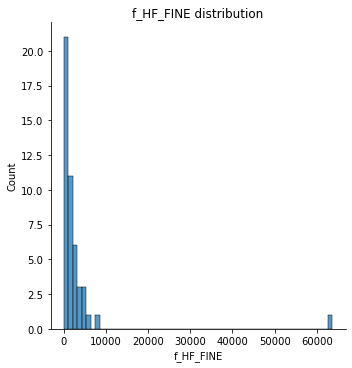

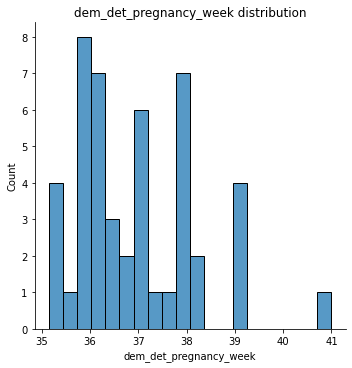

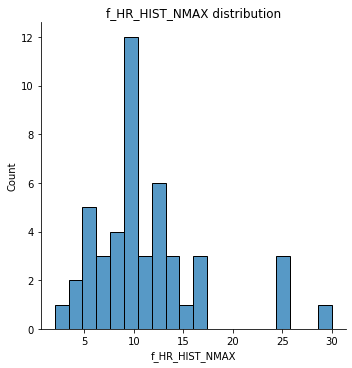

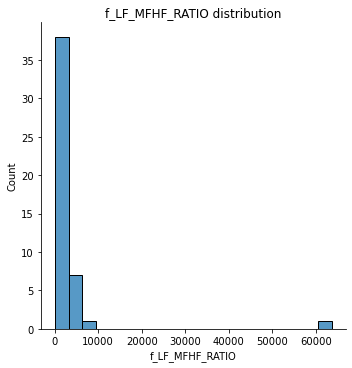

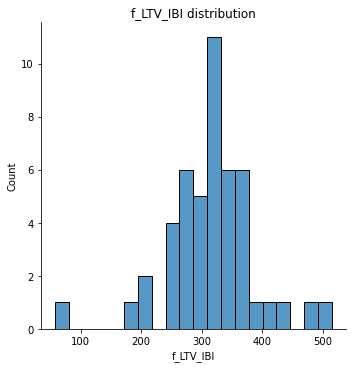

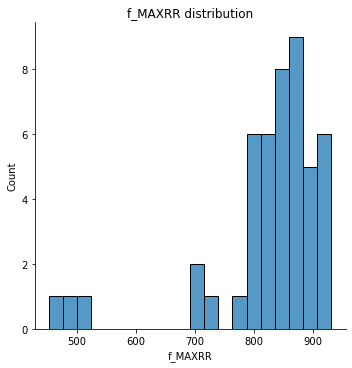

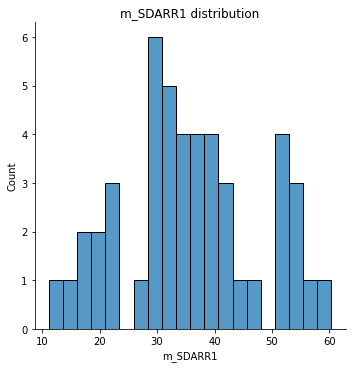

In [67]:
for feat in example_feats:
    if feat == "f_HF_FINE":
        sns.displot(x = df[feat], data=df, bins=60)
        plt.title(f'{feat} distribution')
    else:
        sns.displot(x = df[feat], data=df, bins=20)
        plt.title(f'{feat} distribution');

#### Exporting to CSV:

In [62]:
df_feats.to_csv('df_feats.csv', index=False)
df_targets.to_csv('df_targets.csv', index=False)